In [5]:
import numpy as np
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
from Invoice import Invoice
from Enterprise import Enterprise

In [6]:
enterprise_info=pd.read_csv('./C/1_info.csv')
N_enterprise=enterprise_info.shape[0]

In [7]:
enterprise_dic={}
for i in range(N_enterprise):
    number = enterprise_info['企业代号'][i]
    name = enterprise_info['企业名称'][i]
    credit_rating = enterprise_info['信誉评级'][i]
    break_contract_str = enterprise_info['是否违约'][i]
    break_contract = True if break_contract_str=='是' else False
    enterprise_object=Enterprise(number,name,credit_rating,break_contract)
    enterprise_dic[number]=enterprise_object

In [199]:
invoice_in = pd.read_csv('./C/1_in.csv')
N_in = invoice_in.shape[0]

In [200]:
from datetime import date
def get_date(date_str):
    y,m,d=date_str.split('/')
    if len(m) != 2:
        m = '0' + m
    if len(d) != 2:
        d = '0' + d
    return date.fromisoformat(y+'-'+m+'-'+d)

In [201]:
for i in range(N_in):
    enterprise_name = invoice_in['企业代号'][i]
    number = invoice_in['发票号码'][i]
    date_str = invoice_in['开票日期'][i]
    date = get_date(date_str)
    self_enterprise = enterprise_dic[enterprise_name]
    partner = invoice_in['销方单位代号'][i]
    amount = invoice_in['金额'][i]
    tax = invoice_in['税额'][i]
    sum_money = invoice_in['价税合计'][i]
    state_available_str = invoice_in['发票状态'][i]
    state_available = True if state_available_str == '有效发票' else False
    invoice_object = Invoice(number,date,self_enterprise,partner,amount,tax,sum_money,state_available,True)
    self_enterprise.add_invoice(invoice_object)

In [202]:
invoice_out = pd.read_csv('./C/1_out.csv')
N_out = invoice_out.shape[0]

In [203]:
for i in range(N_out):
    enterprise_name = invoice_out['企业代号'][i]
    number = invoice_out['发票号码'][i]
    date_str = invoice_out['开票日期'][i]
    date = get_date(date_str)
    self_enterprise = enterprise_dic[enterprise_name]
    partner = invoice_out['购方单位代号'][i]
    amount = invoice_out['金额'][i]
    tax = invoice_out['税额'][i]
    sum_money = invoice_out['价税合计'][i]
    state_available_str = invoice_out['发票状态'][i]
    state_available = True if state_available_str == '有效发票' else False
    invoice_object = Invoice(number,date,self_enterprise,partner,amount,tax,sum_money,state_available,False)
    self_enterprise.add_invoice(invoice_object)

In [204]:
for enterprise in enterprise_dic.values():
    enterprise.invoice_list.sort(key=lambda x:x.date)

In [205]:
frame = pd.DataFrame(columns=['日期','资金','企业代号','信誉评级'])
for enterprise in enterprise_dic.values():
    sum = 0
    current_date = enterprise.invoice_list[0].date
    for invoice in enterprise.invoice_list:
        temp = invoice
        if invoice.date!=current_date:
            frame = frame.append([{'日期':current_date,'资金':sum,'企业代号':enterprise.number,'信誉评级':enterprise.credit_rating}],ignore_index=True)
            current_date = invoice.date
        if invoice.buy_in == True:
            sum = sum - invoice.sum_money
        else:
            sum = sum + invoice.amount
    frame = frame.append([{'日期':temp.date,'资金':sum,'企业代号':enterprise.number,'信誉评级':enterprise.credit_rating}],ignore_index=True)


KeyboardInterrupt: 

In [12]:
graph = px.line(frame, x="日期", y="资金",color='企业代号',category_orders={"信誉评级": ["A","B", "C", "D"]},  render_mode="auto")
graph.write_html('./1_graph/total.html')

In [64]:
frame.to_csv("./C/收益波动.csv",index=False,sep=',',encoding='utf_8_sig')

In [13]:
frame2 = pd.DataFrame(columns=['天数','资金','企业代号','信誉评级'])
for i in range(frame.shape[0]-1):
    if frame['企业代号'][i+1]==frame['企业代号'][i]:
        frame2 = frame2.append([{'天数':(frame['日期'][i+1]-frame['日期'][i]).days,'资金':frame['资金'][i],'企业代号':frame['企业代号'][i],'信誉评级':frame['信誉评级'][i]}],ignore_index=True)


In [14]:
frame2 = frame2.sort_values(by=['资金','企业代号'],axis=0,ascending=[True,True]).reset_index(drop=True)

In [15]:
graph2 = px.scatter(frame2, x="资金", y="天数",color='企业代号',category_orders={"信誉评级": ["A","B", "C", "D"]})
graph2.write_html('./1_graph/money.html')

In [16]:
len(enterprise_info[enterprise_info.信誉评级 == 'D']) # A 27 B 38 C 34 D 24

24

In [76]:
frame2

,天数,资金,企业代号,信誉评级
0,3,-2.772872e+09,E1,A
1,1,-2.770322e+09,E1,A
2,1,-2.739831e+09,E1,A
3,3,-2.739830e+09,E1,A
4,12,-2.739700e+09,E1,A
...,...,...,...,...
49675,6,1.641354e+09,E4,C
49676,1,1.642816e+09,E4,C
49677,5,1.642823e+09,E4,C
49678,12,1.642825e+09,E4,C


In [17]:
frame3 = pd.DataFrame(columns=['天数','资金','企业代号','信誉评级','是否违约'])
for enterprise in enterprise_dic.values():
    sum=0
    temp = frame2[frame2.企业代号 == enterprise.number].reset_index(drop=True)
    for i in range(temp.shape[0]):
        sum = sum + temp['天数'][i]
        frame3 = frame3.append([{'天数':sum,'资金':temp['资金'][i],'企业代号':temp['企业代号'][i],'信誉评级':temp['信誉评级'][i],'是否违约':('是' if enterprise.break_contract == True else '否')}],ignore_index=True)

In [223]:
frame3

,天数,资金,企业代号,信誉评级,是否违约
0,3,-2.772872e+09,E1,A,否
1,4,-2.770322e+09,E1,A,否
2,5,-2.739831e+09,E1,A,否
3,8,-2.739830e+09,E1,A,否
4,20,-2.739700e+09,E1,A,否
...,...,...,...,...,...
49675,772,3.511289e+05,E99,D,是
49676,774,3.523300e+05,E99,D,是
49677,775,3.527300e+05,E99,D,是
49678,777,3.529300e+05,E99,D,是


In [18]:
frame3 = frame3.sort_values(by=['企业代号','天数'],axis=0,ascending=[True,True]).reset_index(drop=True)

In [19]:
graph3 = px.line(frame3, x="资金", y="天数",color='企业代号',category_orders={"信誉评级": ["A","B", "C", "D"]},  render_mode="auto")
graph3.write_html('./1_graph/money2.html')

In [20]:
frame4 = pd.DataFrame(columns=['频率','资金','企业代号','信誉评级','是否违约'])
for enterprise in enterprise_dic.values():
    temp = frame3[frame3.企业代号 == enterprise.number].reset_index(drop=True)
    max = temp['天数'][len(temp['天数'])-1]
    for i in range(temp.shape[0]):
        frame4 = frame4.append([{'频率':temp['天数'][i]/max,'资金':temp['资金'][i],'企业代号':temp['企业代号'][i],'信誉评级':temp['信誉评级'][i],'是否违约':('是' if enterprise.break_contract == True else '否')}],ignore_index=True)

In [21]:
graph4 = px.line(frame4, x="资金", y="频率",color='企业代号',category_orders={"信誉评级": ["A","B", "C", "D"]},  render_mode="auto")
graph4.write_html('./1_graph/money3.html')

In [26]:
def poly(frame):
    var_error={}
    poly1d_dic={}
    assert len(frame[frame.企业代号 != frame['企业代号'][0]]) == 0
    x = np.array(frame['资金'])
    y = np.array(frame['频率'])

    for i in range(1,4):
        fi=np.polyfit(x, y, i)
        poly1d_dic[i]=np.poly1d(fi)
        var_error[i]=np.var(np.abs(np.polyval(fi,x)-y))

    '''
    f1 = np.polyfit(x, y, 1)
    p1 = np.poly1d(f1)
    poly1d_dic[1]=p1
    var_error[1]=np.var(np.abs(np.polyval(f1,x)-y))

    f2 = np.polyfit(x, y, 2)
    p2 = np.poly1d(f2)
    poly1d_dic[2]=p2
    var_error[2]=np.var(np.abs(np.polyval(f2,x)-y))

    f3 = np.polyfit(x, y, 3)
    p3 = np.poly1d(f3)
    poly1d_dic[3]=p3
    var_error[3]=np.var(np.abs(np.polyval(f3,x)-y))

    f4 = np.polyfit(x, y, 4)
    p4 = np.poly1d(f4)
    poly1d_dic[4]=p4
    var_error[4]=np.var(np.abs(np.polyval(f4,x)-y))
    '''
    return (poly1d_dic[min(var_error,key=lambda x:var_error[x])])

    p=poly1d_dic[min(var_error,key=lambda x:var_error[x])]
    yvals = p(x)
    plot1 = plt.plot(x, y, 's',label='original values')
    plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=4) #指定legend的位置右下角
    plt.title('polyfitting')
    plt.show()
    print(var_error.values())
    return (min(var_error,key=lambda x:var_error[x]))

In [159]:
data_rate_and_loss = pd.read_csv("./C/rate_and_loss.csv")
def calc_alpha(r, credit_rating):
    for i in range(data_rate_and_loss.shape[0]):
        if data_rate_and_loss["贷款年利率"][i] == r:
            return data_rate_and_loss[credit_rating][i]

def calc_beta(A, F):
    return F(A)

def calc_gamma(credit_rating, break_contract):
    c = {"A": 1, "B": 0.9, "C": 0.7}
    b = {True: 0.5, False: 1}
    return c[credit_rating] * b[break_contract]

def calc_A_(A, F, f,enterprise: "Enterprise"):
    #v, err = integrate.quad(F, -np.inf, A)
    lower = frame4[frame4.企业代号 == enterprise.number].reset_index(drop=True)['资金'][0]
    print(lower,F(lower))
    v = F.integ()(A)-F.integ()(lower)
    return (A * F(A)- lower * F(lower) - v) / (F(A)-F(lower))

def calc_expect_profit(A, r, enterprise: "Enterprise",F):
    alpha = calc_alpha(r, enterprise.credit_rating) # 客户流失率
    beta = calc_beta(A,F) # 资金抵债率
    gamma = calc_gamma(enterprise.credit_rating, enterprise.break_contract) # 企业信誉系数
    f=F.deriv()
    A_ = calc_A_(A,F,f,enterprise) # 无法还债时的期望剩余资金
    print('beta: ',beta)
    print('gamma: ',gamma)
    print('A_: ',A_)
    print('(A_ / gamma - A * (1 + r)) :',(A_ / gamma - A * (1 + r)))
    print('(A * r): ',(A * r))
    return (beta * (A_ / gamma - A) + (1 - beta) * (A * r)) * (1 - alpha)

In [62]:

for enterprise in enterprise_dic.values():
    enterprise=enterprise_dic['E81']
    #print(enterprise.number)
    temp = frame4[frame4.企业代号 == enterprise.number].reset_index(drop=True)
    #poly(temp)
    print(calc_expect_profit(100000,0.0425,enterprise,poly(temp)))

    break

22039.56000000002 0.013916163191942036
beta:  0.10889006420667553
gamma:  1
A_:  60163.94537354189
(A_ / gamma - A * (1 + r)) : -44086.05462645811
(A * r):  4250.0
-498.4671114257473


In [148]:
for enterprise in enterprise_dic.values():
    temp = frame3[frame3.企业代号 == enterprise.number].reset_index(drop=True)
    max = temp['天数'][0]
    print(max)
    break

941


In [25]:
frame4[frame4.企业代号 == 'E1'].reset_index(drop=True)

,频率,资金,企业代号,信誉评级,是否违约
0,0.003188,-2.772872e+09,E1,A,否
1,0.004251,-2.770322e+09,E1,A,否
2,0.005313,-2.739831e+09,E1,A,否
3,0.008502,-2.739830e+09,E1,A,否
4,0.021254,-2.739700e+09,E1,A,否
...,...,...,...,...,...
782,0.995749,1.238512e+08,E1,A,否
783,0.996812,1.412625e+08,E1,A,否
784,0.997875,1.474986e+08,E1,A,否
785,0.998937,1.474997e+08,E1,A,否


In [67]:
frame1 = pd.DataFrame(columns=['日期','资金','企业代号','信誉评级'])
for enterprise in enterprise_dic.values():
    temp = frame[frame.企业代号 == enterprise.number].reset_index(drop=True)
    first_date = temp['日期'][0]
    for i in range(temp.shape[0]):
        frame1 = frame1.append([{'日期':(temp['日期'][i]-first_date).days,'资金':temp['资金'][i],'企业代号':temp['企业代号'][i],'信誉评级':temp['信誉评级'][i],'是否违约':('是' if enterprise.break_contract == True else '否')}],ignore_index=True)

In [105]:
frame1.to_csv("./C/收益波动.csv",index=False,sep=',',encoding='utf_8_sig')

MSE = 4219737181.129326

R2  = 0.9705062123517532



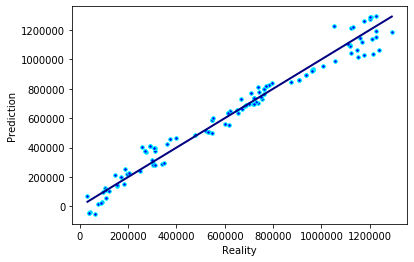

In [14]:
# 线性回归LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_data = np.array(frame1[frame1.企业代号 == 'E81']['日期']).reshape(-1, 1)
y_data = np.array(frame1[frame1.企业代号 == 'E81']['资金']).reshape(-1, 1)

# 数据分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print ("MSE =", mean_squared_error(y_test, y_pred),end='\n\n')
print ("R2  =", r2_score(y_test, y_pred),end='\n\n')

# 画图
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, c="blue", edgecolors="aqua",s=13)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=2, color='navy')
ax.set_xlabel('Reality')
ax.set_ylabel('Prediction')
plt.show()



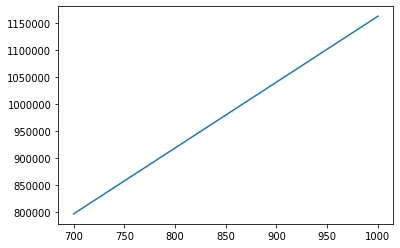

In [87]:
x = np.linspace(start=700,stop=1000).reshape(-1, 1)
y = model.predict(x).reshape(-1, 1)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

MSE = 1029950828950683.9

R2  = 0.9985952788402545



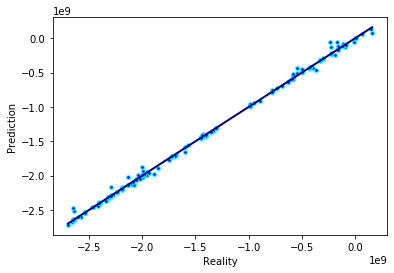

In [173]:
# 线性回归LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
N=len(frame1[frame1.企业代号 == 'E1']['日期'])
x_data = np.array(frame1[frame1.企业代号 == 'E1']['日期']).reshape(-1, 1)
y_data = np.array(frame1[frame1.企业代号 == 'E1']['资金']).reshape(-1, 1)

# 数据分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print ("MSE =", mean_squared_error(y_test, y_pred),end='\n\n')
print ("R2  =", r2_score(y_test, y_pred),end='\n\n')

# 画图
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, c="blue", edgecolors="aqua",s=13)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=2, color='navy')
ax.set_xlabel('Reality')
ax.set_ylabel('Prediction')
plt.show()

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def predict(frame_predict):
    N=len(frame_predict['日期'])
    days=frame_predict['日期'][len(frame_predict['日期'])-1]
    x_data = np.array(frame_predict['日期']).reshape(-1, 1)
    y_data = np.array(frame_predict['资金']).reshape(-1, 1)

    # 数据分割
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

    model = LinearRegression()
    model.fit(x_train, y_train.astype("int"))
    y_pred = model.predict(x_test)
    
    '''
    print ("MSE =", mean_squared_error(y_test, y_pred),end='\n\n')
    print ("R2  =", r2_score(y_test, y_pred),end='\n\n')

    # 画图
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, c="blue", edgecolors="aqua",s=13)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=2, color='navy')
    ax.set_xlabel('Reality')
    ax.set_ylabel('Prediction')
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot(x_data,y_data)
    plt.show()
'''
    return model.predict(np.array([days+365]).reshape(-1, 1))[0]-frame_predict['资金'][N-1]

In [202]:
from scipy.stats import norm
from Enterprise import Enterprise

def calc(enterprise, A, r):
    #print(enterprise.number)
    temp = frame1[frame1.企业代号 == enterprise.number].reset_index(drop=True)
    remain = predict(temp)
    print("remain=", remain[0])
    beta = norm(remain[0],remain[0]).cdf(A)
    print("beta=", beta)
    gamma = calc_gamma(enterprise.credit_rating, enterprise.break_contract)
    print("gamma=", gamma)
    EL =  remain[0] / gamma - A * r
    print("EL=", EL)
    alpha = calc_alpha(r, enterprise.credit_rating)
    print("alpha=", alpha)
    return 1.0 * (A * r * (1 - beta) + EL * beta) * (1 - alpha)

In [177]:
rates = list(data_rate_and_loss["贷款年利率"])
As = [100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000, 260000, 280000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 800000, 900000, 1000000]

In [203]:
for enterprise in enterprise_dic.values():
    if enterprise.credit_rating == "D":
        continue
    ans = 0
    ans_A = 0
    ans_r = 0
    for r in rates:
        for A in As:
            ans_ = calc(enterprise, A, r)
            print(enterprise.number, ans, A, r)
            if (ans_>ans):
                ans = ans_
                ans_A = A
                ans_r = r
    print(enterprise.number, ans_, ans_A, ans_r)

 1
EL= -1455099231.2669444
alpha= 0.135727183
E1 0 280000 0.0465
remain= -1458137704.5217881
beta= 1.0
gamma= 1
EL= -1458151654.5217881
alpha= 0.135727183
E1 0 300000 0.0465
remain= -1449241660.1344948
beta= 1.0
gamma= 1
EL= -1449257935.1344948
alpha= 0.135727183
E1 0 350000 0.0465
remain= -1441541104.8943963
beta= 1.0
gamma= 1
EL= -1441559704.8943963
alpha= 0.135727183
E1 0 400000 0.0465
remain= -1457127373.39745
beta= 1.0
gamma= 1
EL= -1457148298.39745
alpha= 0.135727183
E1 0 450000 0.0465
remain= -1451308987.428464
beta= 1.0
gamma= 1
EL= -1451332237.428464
alpha= 0.135727183
E1 0 500000 0.0465
remain= -1451386735.0656457
beta= 1.0
gamma= 1
EL= -1451412310.0656457
alpha= 0.135727183
E1 0 550000 0.0465
remain= -1452401359.8107433
beta= 1.0
gamma= 1
EL= -1452429259.8107433
alpha= 0.135727183
E1 0 600000 0.0465
remain= -1464874855.8482118
beta= 1.0
gamma= 1
EL= -1464905080.8482118
alpha= 0.135727183
E1 0 650000 0.0465
remain= -1460361611.2935023
beta= 1.0
gamma= 1
EL= -1460394161.293502

KeyboardInterrupt: 